## Załadowanie pakietów i wczytanie danych

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)

In [2]:
data_raw = pd.read_csv('https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/forest_fires_dataset.csv')
data = data_raw.copy(deep=True)

# Eksploracja danych

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


Tablica w pełni wypełniona, czyli jest dobrze. 

In [4]:
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29.0,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27.0,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86.0,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63.0,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40.0,4.0,0.0,0.0


Zatem widzimy, że kolumna month i day są typu string, w celu łatwiejsza eksploracji i przygotowanie pod dalsze uczenie maszynowe zamieńmy je na wartości liczbowe.

In [5]:
data["day"].unique()
weekdays = {"mon":1, "tue":2, "wed":3, "thu":4, "fri":5, "sat":6, "sun":7}

In [6]:
data["month"] = pd.to_datetime(data["month"], format="%b").dt.month
data["day"] = data["day"].apply(lambda x: weekdays[x])
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00


Sprawdźmy, czy mamy jakieś duplikaty w ramce.

In [7]:
data.duplicated().value_counts()

False    513
True       4
dtype: int64

Widzimy 4 zduplikowane wiersze, usuńmy je bo mogą wpływać na wielkość danych obserwacji, chociaż niekoniecznie jest to potrzebne z powodu niewielkiej ilości.

In [8]:
data.drop_duplicates(inplace=True, ignore_index=True)
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
509,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
510,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
511,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00


In [9]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,4.678363,4.300195,7.485380,4.251462,90.637427,110.989279,549.155166,9.023587,18.887524,44.348928,4.010526,0.021832,12.891598
std,2.320059,1.230925,2.275095,2.075038,5.540920,64.191013,247.724594,4.575543,5.828128,16.358803,1.796613,0.297107,63.892586
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,440.900000,6.400000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.540000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Zauważmy, że *rain* ma dosyć małe oddchylenie standardowe (tzn. jego rozkład jest bliski jednopunktowemu) oraz średnią bliską 0. Inną obserwacją, którą możemy wysnuć to przechylenie rozkładu kolumny *DC* w prawą stronę (mediana > średniej
).

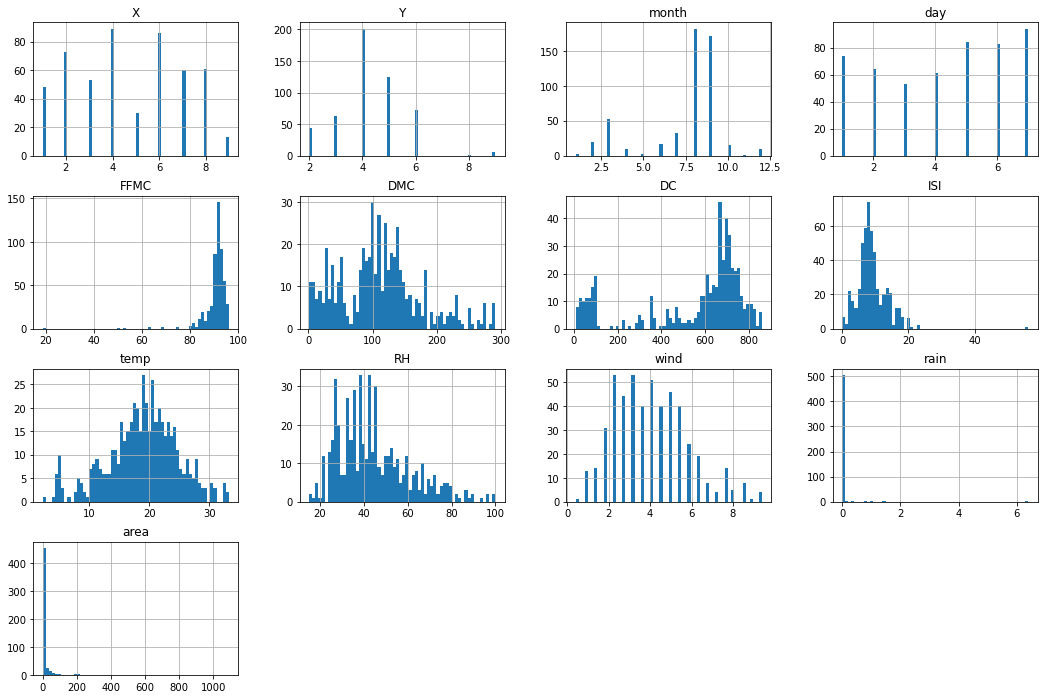

In [10]:
data.hist(bins = 60, figsize=(18, 12))
plt.show()

Widzimy rozkład normalny w przypadku temperatury i w przypadku ISI (widać dziwną wartość niewiadomo, czy jest to wartość odstająca), oraz dużą ilość wystąpień miesięcy sierpnia i września w ramce (8 i 9 miesiąc roku). 

In [11]:
data["ISI"].sort_values()

375     0.0
308     0.4
296     0.4
96      0.7
12      0.8
       ... 
204    20.3
481    21.3
11     22.6
263    22.7
22     56.1
Name: ISI, Length: 513, dtype: float64

Widzimy, że w 22 wierszy ramki jest nasze wystąpienie, które można uznać za odstające.

In [12]:
data.iloc[22, :] #chyba nic dziwnego, bo ten wskaźnik pokazuje rozszerzanie się potencjalnego ognia

X          7.0
Y          4.0
month      6.0
day        7.0
FFMC      94.3
DMC       96.3
DC       200.0
ISI       56.1
temp      21.0
RH        44.0
wind       4.5
rain       0.0
area       0.0
Name: 22, dtype: float64

Sprawdźmy, wpływ miesięcy na spaloną powierzchnię.

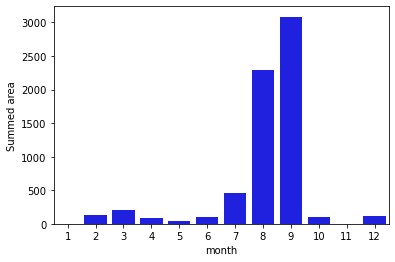

In [13]:
grouped_month = data[["month", "area"]].groupby(by = "month").sum().reset_index()
sns.barplot(data=grouped_month, x="month", y="area", color="blue")
plt.ylabel("Summed area")
plt.show()

Widzimy, że większość spalonej powierzchni została pochłonięta ogniem w sierpniu i wrześniu.
## Zależności pomiędzy konkretnymi zmiennymi
Do znalezienia zależności użyjemy macierzy korelacji.

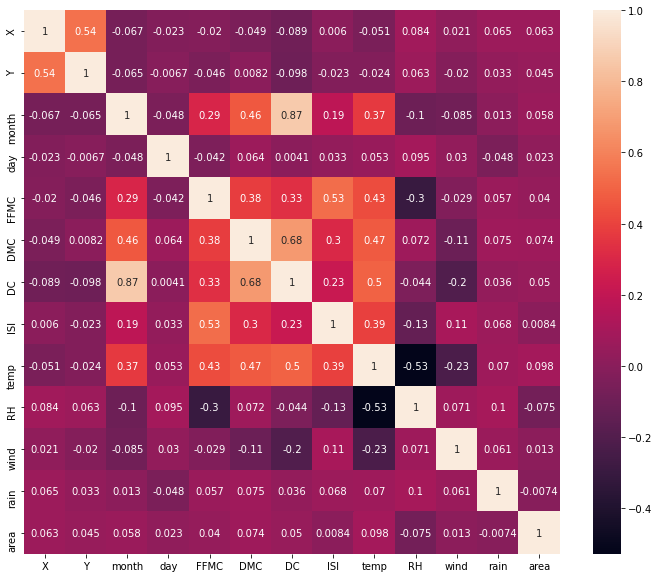

In [14]:
corMatrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corMatrix, annot=True)
plt.show()

Widzimy pewne korelacje pomiędzy 

- *DMC*, *DC*, co wynika zapewne z tego, że oba wskaźniki opisują nasycenie gleby,
- *RH*, *temp*, korelacja pomiędzy wilgotnością a temperaturą (są odwrotnie proporcjonalnie),
- *DC*, *month*, zapewne istnieją miesiące, kiedy jest zwiększone nasycenie paliwem pochodzącym od zwierząt.

Ale nie ma żadnej korelacji pomiędzy *area* (szukana wartość), a innymi wskaźnikami. Twórca zbioru w opisie zasugerował, aby modelować wartości area używając logarytmu. Sprawdźmy, czy istnieją zależności pomiędzy logarytmem. Sprawdzam $\log(1+x)$, ponieważ wiekszość pól *area* ma wartość $0$, więc sam $\log$ wymagałby usunięcia znacznej ilości pól.

In [20]:
(data.area == 0).value_counts() #blisko połowa

False    269
True     244
Name: area, dtype: int64

In [ ]:
data.insert(len(data.columns), "log_area", np.log1p(data.area))
corMatrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corMatrix, annot=True)
plt.show()

Dalej nie widać żadnej korelacji pomiędzy *log_area*, a innymi czynnikami. Zwizualizujemy jeszcze powyżej wymienione koreleacje pomiędzy zmiennymi, aby zweryfikować nasze przypuszczenia.

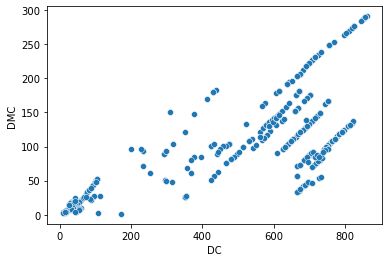

In [22]:
sns.scatterplot(data=data, x="DC", y="DMC")
plt.show()

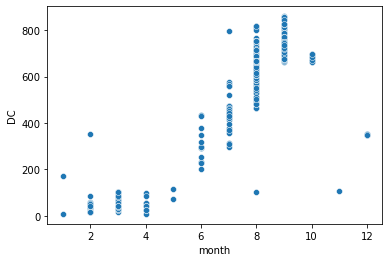

In [21]:
sns.scatterplot(data=data, x="month", y="DC")
plt.show()

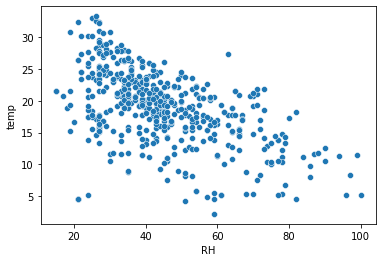

In [23]:
sns.scatterplot(data=data, x="RH", y="temp")
plt.show()

## Pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data_raw)
prof.to_file(output_file='autoProfile.html')

### Ograniczenia
- Wydaje mi się, że skoro generowanie raportu dla 517 rekordów trwało około 20 sekund. To generowanie raportu dla dokumentu o dużej ilości rekordów może rosnąć bardzo szybko.
- Poza tym nie przygotowuje on naszej ramki danej pod uczenie maszynowe, daje jedynie podpowiedzi jak to zrobić. Nie ma możliwości zmiany danych wejśc